# Resonances in the Solar System

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Terminology" data-toc-modified-id="Terminology-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Terminology</a></span></li><li><span><a href="#The-moons-of-Jupiter" data-toc-modified-id="The-moons-of-Jupiter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The moons of Jupiter</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Orbits" data-toc-modified-id="Orbits-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Orbits</a></span></li><li><span><a href="#Positions" data-toc-modified-id="Positions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Positions</a></span></li><li><span><a href="#Eccentricities" data-toc-modified-id="Eccentricities-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Eccentricities</a></span></li><li><span><a href="#Resonances" data-toc-modified-id="Resonances-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Resonances</a></span></li><li><span><a href="#Fourier-analysis" data-toc-modified-id="Fourier-analysis-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Fourier analysis</a></span></li></ul></li><li><span><a href="#Kirkwood-Gaps" data-toc-modified-id="Kirkwood-Gaps-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Kirkwood Gaps</a></span></li><li><span><a href="#Planets-(and-Pluto)" data-toc-modified-id="Planets-(and-Pluto)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Planets (and Pluto)</a></span></li><li><span><a href="#Pluto-and-Neptune" data-toc-modified-id="Pluto-and-Neptune-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Pluto and Neptune</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#Jupiter-and-Saturn" data-toc-modified-id="Jupiter-and-Saturn-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Jupiter and Saturn</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Eccentricity" data-toc-modified-id="Eccentricity-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Eccentricity</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Analysis</a></span></li><li><span><a href="#Resonance" data-toc-modified-id="Resonance-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Resonance</a></span></li></ul></li></ul></div>

## Terminology

In celestial mechanics, orbital resonance occurs when orbiting bodies exert regular, periodic gravitational influence on each other, usually because their orbital periods are related by a ratio of small integers:
$$ \frac{P_{inner}}{P_{outer}} = \frac{p}{p+q} $$

Thus, for example, a 1:2 resonance has $p=q=1$ and a 4:3 resonance has $p=3, q=1$.

Even if a resonance is a minimum-energy configuration, there is generally some oscillation around this minimum: this is called ___libration___.

Resonance effects can be short-term, of the order of an orbital period, or much longer term and non-periodic. The latter is called a ___secular___ variation.

The [Wikipedia page on orbital resonance](https://en.wikipedia.org/wiki/Orbital_resonance) is quite helpful.

## The moons of Jupiter



### Introduction

This section is closely based on a REBOUND example provided by Deborah Lokhorst. If you have rebound installed (only possible on Linux/Mac, not Windows) run the original [Resonances_of_Jupiters_moons.ipynb](rebound_official_examples/Resonances_of_Jupiters_moons.ipynb). The current notebook takes the more portable approach of using simulation data saved as FITS files.

The four Galilean moons of Jupiter were downloaded from NASA HORIZONS and their orbits were integrated forwards in time. This is a well-known example of a 1:2:4 resonance (also called Laplace resonance) in orbiting bodies. We calculate the resonant arguments see them oscillate with time. We also perform an Fast Fourier Transform (FFT) on the x-position of Io, to look for the period of oscillations caused by the 2:1 resonance between Io and Europa.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

from astropy.table import Table
import astropy.units as u

### Orbits

Summary data is in `JupiterMoons.fits`, timecourse data for 80 years in four further files named after individual moons.

In [2]:
moons = Table.read('../files/JupiterMoons.fits')
moons

moon,a,e,i,P
,km,deg,,d
bytes8,float64,float64,float64,float64
Io,422101.2691415224,0.565386945454432,0.039038133248204904,1.7716205775596672
Europa,671474.7210516771,0.8036501058887978,0.04380379278220206,3.5545509369934476
Ganymede,1069586.204710489,0.0975539180085016,0.040314226257651,7.145736332699823
Callisto,1881565.6721480873,0.36321447529458395,0.03499926933631003,16.672090869172656


We can see that the inner two moons have high eccentricity but all have near-zero inclination. What about orbital periods (here shown in Earth days)?

In [3]:
P_io = moons[0]['P']
moons['P_ratio'] = moons['P']/P_io
moons['moon', 'P_ratio']

moon,P_ratio
,d
bytes8,float64
Io,1.0
Europa,2.006383862333374
Ganymede,4.033446226134251
Callisto,9.410644175367256


So Io, Europa and Ganymede are ___very___ close to a 1:2:4 ratio. Callisto seems more random.

Next get the simulation tables for further analysis. Time, x-position and eccentricity are clear. Longitude is the angular position in degrees from some reference direction. 'varpi' is $\varpi$, the longitude of the periapsis (also called longitude of the pericenter).

![555px-Orbit1.svg.png](555px-Orbit1.svg.png)

So $\Omega$ is the longitude of ascending node and $\omega$ is the argument of perihelion. Our varpi column is $\varpi = \Omega + \omega$.

In [5]:
Io = Table.read('../files/Io.fits')
Europa = Table.read('../files/Europa.fits')
Ganymede = Table.read('../files/Ganymede.fits')
Callisto = Table.read('../files/Callisto.fits')
times = Io['time']
Io[:4]

time,x,e,longitude,varpi
d,AU,,deg,deg
float64,float64,float64,float64,float64
0.0,-0.001321053576063158,0.0043502417422881115,-241.65700284794426,-189.60563947459116
0.29220292202922027,-0.002809149327993943,0.004355497681667045,-182.31244875438242,-189.81638625193867
0.5844058440584405,-0.001514771562275866,0.00435516179683641,-122.967922473049,-190.030114870379
0.8766087660876608,0.0012742040650158793,0.004360011503570393,-63.62092298166924,-190.27886999219533


### Positions

We can plot their x-locations as a function of time and observe their relative motions around Jupiter. At this level of detail it looks pretty much like regular sine waves.

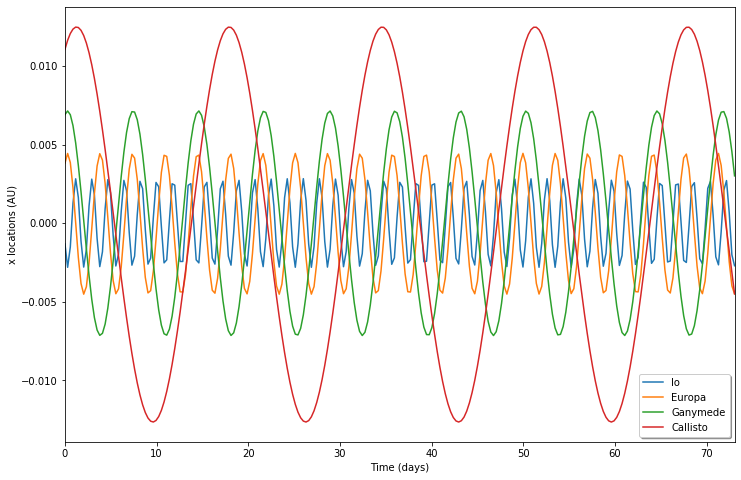

In [6]:
labels = list(moons['moon'])

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111)
plt.plot(times,Io['x'],label=labels[0])
plt.plot(times,Europa['x'],label=labels[1])
plt.plot(times,Ganymede['x'],label=labels[2])
plt.plot(times,Callisto['x'],label=labels[3])
ax.set_xlim(0,0.2*365.25)
ax.set_xlabel("Time (days)")
ax.set_ylabel("x locations (AU)")
ax.tick_params()
plt.legend(loc='lower right', shadow=True);

### Eccentricities

If we plot the eccentricities as a function of time, they clearly oscillate significantly for the three inner moons, which are in resonance with each other.  Contrasting with these large oscillations is the smaller oscillation of the outer Galilean moon, Callisto, which is shown for comparison. The three inner moons are in resonance, 1:2:4, but Callisto is not quite in resonance with them, though it is expected to migrate into resonance with them eventually.

Also visible is the gradual change in eccentricity as a function of time: Callisto's mean eccentricity is decreasing and Ganymede's mean eccentricity is increasing.  This is a secular change due to the interactions with the inner moons.

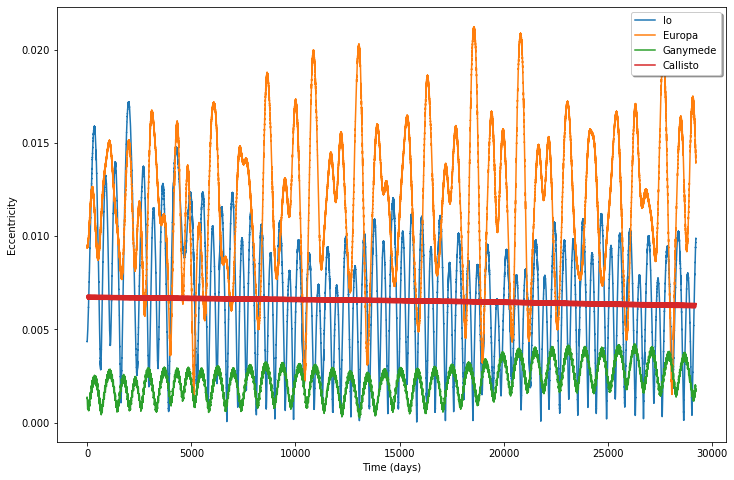

In [7]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111)
plt.plot(times,Io['e'],label=labels[0])
plt.plot(times,Europa['e'],label=labels[1])
plt.plot(times,Ganymede['e'],label=labels[2])
plt.plot(times,Callisto['e'],label=labels[3])
ax.set_xlabel("Time (days)")
ax.set_ylabel("Eccentricity")
plt.legend(loc='upper right', shadow=True);

### Resonances

The ratio of periods is defined as : 
$$P_{\rm in}/P_{\rm out} ~= p / (p + q)$$

Resonances are identified by looking at the resonant arguments, which are defined as: 
$$ \theta = (p + q)\lambda_{\rm out} - p \lambda_{\rm in} - q \omega_{\rm out/in}$$
where $\lambda_{\rm out}$ and $\lambda_{\rm in}$ are the mean longitudes of the outer and inner bodies, respectively, and $\omega_{\rm out}$ is the longitude of pericenter of the outer/inner body.
 

If the resonant argument, $\theta$, oscillates but is constrained within some range of angles, then 
there is a resonance between the inner and outer bodies. We call this ___libration___ of the angle $\theta$. 
The trick is to find what the values of q and p are.  For our case, we can easily see that 
there are two 2:1 resonances between the moons, so $p = q = 1$ and their resonant arguments would follow 
the function:
$$\theta = 2 \lambda_{\rm out} - \lambda_{\rm in} - \omega_{\rm out}$$

To make the plotting easier, we can use helper functions that puts angles into 0 to 360 degrees or -180 to 180 degrees.

In [8]:
# val is assumed to be in degrees but without units

def zeroTo360(val):
    while val < 0:
        val += 360
    while val > 360:
        val -= 360
    return val

def min180To180(val):
    while val < -180:
        val += 360
    while val > 180:
        val -= 360
    return val

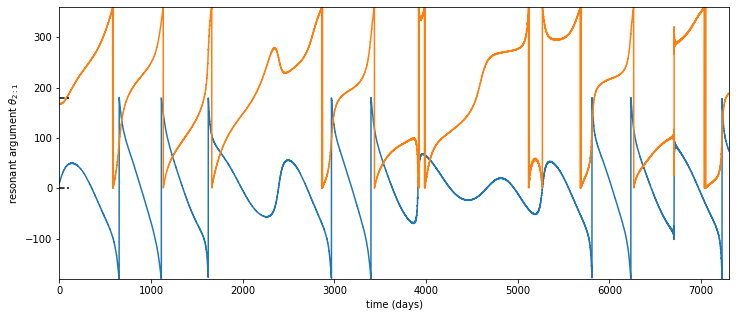

In [9]:
Nout = len(times)

# We can calculate theta, the resonant argument of the 1:2 Io-Europa orbital resonance,
# which oscillates about 0 degrees:
theta = [min180To180(2.*Europa['longitude'][i] - Io['longitude'][i] - Io['varpi'][i]) for i in range(Nout)]

# There is also a secular resonance argument, corresponding to the difference in the longitude of perihelions:
# This angle oscillates around 180 degs, with a longer period component.
theta_sec = [zeroTo360(-Europa['varpi'][i] + Io['varpi'][i]) for i in range(Nout)]

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.plot(times,theta)  
ax.plot(times,theta_sec) # secular resonance argument
ax.set_xlim([0,20.*365.25])
ax.set_ylim([-180,360.])
ax.set_xlabel("time (days)")
ax.set_ylabel(r"resonant argument $\theta_{2:1}$")
ax.plot([0,100],[180,180],'k--')
ax.plot([0,100],[0,0],'k--');

Io, Europa and Ganymede are in a Laplace 1:2:4 resonance,
which additionally has a longer period libration argument that depends on all three of 
their mean longitudes, that appears slightly in the other resonant arguments:

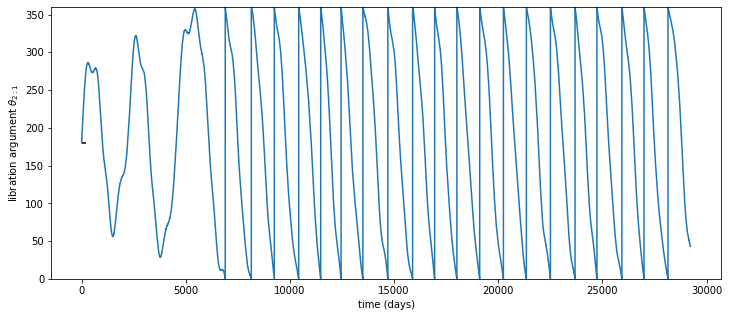

In [10]:
thetaL = [zeroTo360(-Io['longitude'][i] + 3.*Europa['longitude'][i] 
                    - 2.*Ganymede['longitude'][i]) for i in range(Nout)]

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)

ax.plot(times,thetaL)
ax.set_ylim([0,360.])
ax.set_xlabel("time (days)")
ax.set_ylabel(r"libration argument $\theta_{2:1}$")
ax.plot([0,200],[180,180],'k--');

### Fourier analysis

For completeness, let's take a brief look at the Fourier transforms of the x-positions of Io, and see if it has oscillations related to the MMR.

We use the scipy Lomb-Scargle periodogram function, which is good for non-uniform time series analysis.

In [11]:
from scipy import signal
Npts = 3000

# look for periodicities with periods logarithmically spaced between 0.01 yrs and 100 yrs
logPmin = np.log10(0.001*365.25)
logPmax = np.log10(10.*365.25)

# set up a logspaced array from 0.01 to 100 yrs
Ps = np.logspace(logPmin,logPmax,Npts)
# calculate an array of corresponding angular frequencies
ws = np.asarray([2*np.pi/P for P in Ps])

# calculate the periodogram (using ws as the values for which to compute it)
periodogram_Io = signal.lombscargle(times,Io['x'],ws)
periodogram_Europa = signal.lombscargle(times,Europa['x'],ws)
periodogram_Ganymede = signal.lombscargle(times,Ganymede['x'],ws);

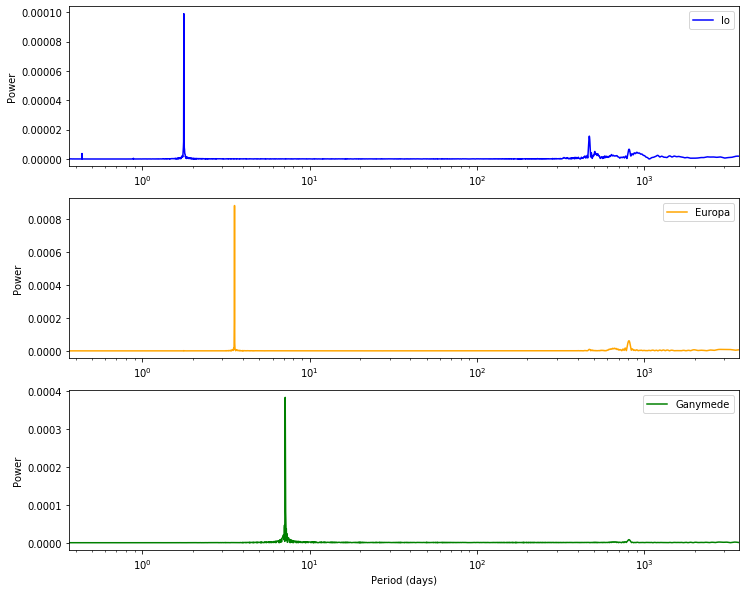

In [12]:
fig = plt.figure(figsize=(12,10))
ax = plt.subplot(311)

# Since the computed periodogram is unnormalized, taking the value A**2*N/4, 
# we renormalize the results by applying these functions inversely to the output:
ax.set_xscale('log')
ax.set_xlim([10**logPmin,10**logPmax])
# ax.set_xlabel("Period (days)")
ax.set_ylabel("Power")
ax.plot(Ps, np.sqrt(4*periodogram_Io/Nout), c='b', label='Io')
ax.legend()

ax2 = plt.subplot(312)
ax2.set_xscale('log')
ax2.set_xlim([10**logPmin,10**logPmax])
# ax2.set_xlabel("Period (days)")
ax2.set_ylabel("Power")
ax2.plot(Ps, np.sqrt(4*periodogram_Europa/Nout), c='orange', label='Europa')
ax2.legend();

ax3 = plt.subplot(313)
ax3.set_xscale('log')
ax3.set_xlim([10**logPmin,10**logPmax])
ax3.set_xlabel("Period (days)")
ax3.set_ylabel("Power")
ax3.plot(Ps, np.sqrt(4*periodogram_Ganymede/Nout), c='g', label='Ganymede')
ax3.legend();

For Io, the first spike at about 2 days is caused by its motion around Jupiter in its orbit.

The other Io spikes, corresponding to oscillations with periods of around 1 year, are caused by the MMR of the moons.  The largest spike at ~1.3 years is from the 1:2 resonance of the two inner moons, Io and Europa.

## Kirkwood Gaps

Asteroids have semi-major axes between about 2.1 to 3.5 AU and can experience resonances with the orbit of Jupiter at 5.2 AU. This leads to 'gaps' in the distribution of orbital parameters as these orbits are resonance-destabilized.

Details on the code are in the [asteroids.ipynb notebook](../plotting/asteroids.ipynb). A plot from that notebook is copied here, showing sin(inclination) vs semi-major axis:

![moving_objects.png](../files/moving_objects.png)

Color coding (based on magnitudes in three SDSS filters) is not particularly relevant here. More importantly, the orbits fall into 3 groups with gaps between.

It would be interesting to plot orbital period rather than semi-major axis and compare this to Jupiter.  A random subset of the data from the above plot was saved as a Pandas dataframe:

In [15]:
import pandas as pd
data = pd.read_pickle('../files/moving_objects.pkl')
data.shape

(3316, 61)

This includes a column for `a` but not `P`, so add columns for the period and P_asteroid/P_jupiter ratio:

In [16]:
data['P_yr'] = data['aprime']**(3/2)
P_jup = 11.862 # years
data['P_ratio'] = data['P_yr']/P_jup

data[:3][['P_yr', 'P_ratio']]

,P_yr,P_ratio
0,5.229886,0.440894
10,3.468895,0.292438
20,3.522940,0.296994


For a different view of the distribution, plot a histogram with `P_ratio` as the x-axis:

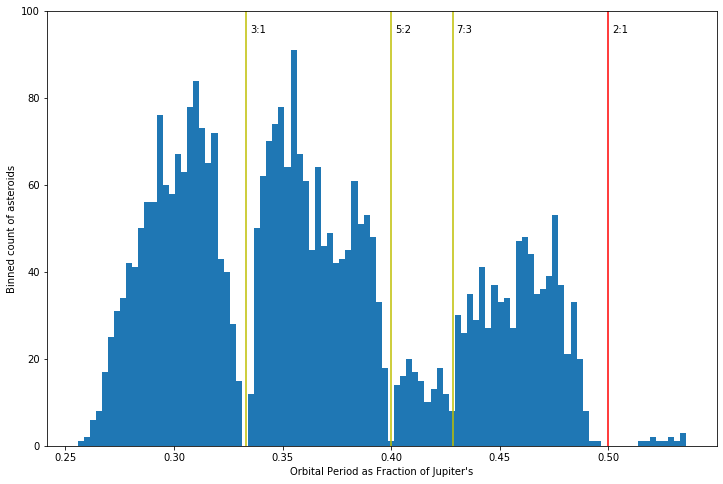

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(data['P_ratio'], bins=100)

yrange = (0, 100)
ax.plot((1/3, 1/3), yrange, 'y-')
ax.plot((2/5, 2/5), yrange, 'y-')
ax.plot((3/7, 3/7), yrange, 'y-')

ax.plot((1/2, 1/2), yrange, 'r-')

ax.set_ylim(yrange)

ax.text(0.335, 95, '3:1')
ax.text(0.402, 95, '5:2')
ax.text(0.43, 95, '7:3')
ax.text(0.502, 95, '2:1')

ax.set_xlabel('Orbital Period as Fraction of Jupiter\'s')
ax.set_ylabel('Binned count of asteroids');

The clearest gaps correspond to 3:1 and 5:2 resonances, shown with yellow lines. Also, the 2:1 resonance (red line) seems to act as a fairly hard boundary confining the asteroid belt: nothing can survive very long in orbits near here.

## Planets (and Pluto)

We definitely need to include Pluto because it has an interesting and well-characterized resonance with Neptune.

What else might look resonance-like? Let's get some data and see how the orbital periods compare:

In [20]:
planets = Table.read('../files/planets.fits')
planets.sort('a')
planets['Planet', 'a', 'P', 'e', 'i']

Planet,a,P,e,i
,AU,yr,,
bytes7,float64,float64,float64,float64
Mercury,0.3871,0.2408,0.206,7.0
Venus,0.7233,0.6152,0.007,3.39
Earth,1.0,1.0,0.017,0.0
Mars,1.5273,1.8809,0.093,1.85
Jupiter,5.2028,11.862,0.048,1.31
Saturn,9.5388,29.458,0.056,2.49
Uranus,19.1914,84.01,0.046,0.77
Neptune,30.0611,164.79,0.01,1.77


In [21]:
names = planets['Planet']
periods = planets['P']
print('Orbital period ratios of adjacent planets\n')
for i in range(len(names)-1):
    print(f'{periods[i]/periods[i+1]:.4f}   {names[i]}:{names[i+1]} ')

Orbital period ratios of adjacent planets

0.3914   Mercury:Venus 
0.6152   Venus:Earth 
0.5317   Earth:Mars 
0.1586   Mars:Jupiter 
0.4027   Jupiter:Saturn 
0.3506   Saturn:Uranus 
0.5098   Uranus:Neptune 
0.6630   Neptune:Pluto 


Pluto is believed to be captured in a 3:2 resonance with Neptune, which merits more analysis. Jupiter:Saturn is less convincingly 5:2, but these are such massive planets that a section on them is included below.

There are lots of possible ratios of small-ish integers, so we can generally find something close to each of these values just by concidence. See one list [here](https://en.wikipedia.org/wiki/Orbital_resonance#Coincidental_'near'_ratios_of_mean_motion).

## Pluto and Neptune

### Introduction

Pluto: a planet, a dwarf planet, a KBO (Kuiper Belt Object) or the Pluto-Charon binary system according to taste.

It has a relatively high eccentricity (0.25) and orbital inclination ($17^\circ$). Unusually, it crosses inside the orbit of Neptune for part of its orbit, risking destruction by a planet about 7,000 times more massive. Survival relies on multiple resonances:

- A mean-motion resonance of 2:3
- The resonance of the perihelion (libration around 90°), keeping the perihelion above the ecliptic
- The resonance of the longitude of the perihelion in relation to that of Neptune

### Data

TODO

## Jupiter and Saturn

### Introduction

This section is again closely based on a REBOUND example. If you have rebound installed (only possible on Linux/Mac, not Windows) run the original [FourierSpectrum.ipynb](rebound_official_examples/FourierSpectrum.ipynb). The current notebook takes the more portable approach of using simulation data saved as FITS files.

The orbital periods of Jupiter and Saturn are 11.862 and 29.458 years respectively, close to but not quite a 2:5 ratio. This may be an example of a temporary coincidence rather than a captured resonance, but as these two planets contain most of the Solar System mass other than the Sun they certainly dominate the neighbourhood. The [Nice model](https://en.wikipedia.org/wiki/Nice_model) suggests that an earlier 2:1 resonance played a key role in shaping the early Solar System.

Having some idea of what the secular timescales are in the Solar System, the integration was run for $3\times 10^5$ yrs.  It contains $10^5$ outputs in order to resolve the planets' orbital periods ($\sim 10$ yrs) in the Fourier spectrum.

### Data

Simulation data is in two FITS files, with the same structure as for the Galilean moons of the previous section:

In [22]:
Jupiter = Table.read('../files/Jupiter.fits')
Saturn = Table.read('../files/Saturn.fits')
Jupiter[:5]

time,x,e,longitude,varpi
d,AU,,deg,deg
float64,float64,float64,float64,float64
0.0,-0.836285950260745,0.0487636955620776,-93.8862573196022,14.072834674168982
3.000030000300003,4.938927547374019,0.04838713150895071,-2.884859416583754,13.950757330911717
6.000060000600006,-0.3240835174286092,0.048268294862297764,88.18034302325277,14.016125938569653
9.000090000900009,-5.4415371736436695,0.04821060866824498,179.22915841383858,14.162435149783892
12.000120001200012,-0.4606701824602611,0.04813274045406853,-89.74267269052311,14.240021857505427


### Eccentricity

Let's see what the eccentricity evolution looks like with matplotlib. Fluctuations for these massive planets are clear and regular.

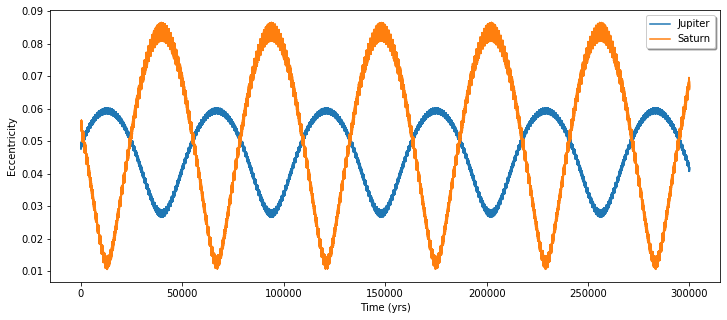

In [23]:
labels = ["Jupiter", "Saturn"]
times = Jupiter['time']

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times, Jupiter['e'], label=labels[0])
plt.plot(times, Saturn['e'], label=labels[1])
ax.set_xlabel("Time (yrs)")
ax.set_ylabel("Eccentricity")
plt.legend(loc='upper right', shadow=True);

### Analysis

Now let's try to analyze the periodicities in this signal.  Here we have a uniformly spaced time series, so we could run a Fast Fourier Transform, but as an example of the wider array of tools available through scipy, let's run a Lomb-Scargle periodogram (which allows for non-uniform time series).

Let's check for periodicities with periods logarithmically spaced between 10 and $10^5$ yrs.  From the documentation, we find that the `lombscargle()` function requires a list of corresponding angular frequencies (`ws`), and we obtain the appropriate normalization for the plot.  To avoid conversions to orbital elements, we analyze the time series of Jupiter's x-position.

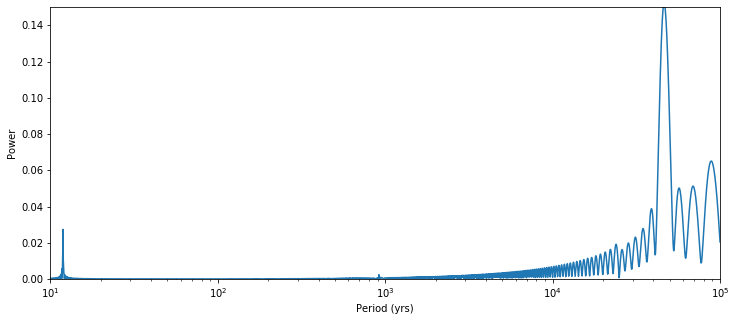

In [24]:
from scipy import signal
Npts = 3000
logPmin = np.log10(10.)
logPmax = np.log10(1.e5)
Ps = np.logspace(logPmin,logPmax,Npts)
ws = np.asarray([2*np.pi/P for P in Ps])

periodogram = signal.lombscargle(times, Jupiter['x'], ws)

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.plot(Ps,np.sqrt(4*periodogram/Nout))
ax.set_xscale('log')
ax.set_xlim([10**logPmin,10**logPmax])
ax.set_ylim([0,0.15])
ax.set_xlabel("Period (yrs)")
ax.set_ylabel("Power");

We pick out the obvious signal in the eccentricity plot with a period of $\approx 45000$ yrs, which is due to secular interactions between the two planets.  There is quite a bit of power aliased into neighboring frequencies due to the short integration duration, with contributions from the second secular timescale, which is out at $\sim 2\times10^5$ yrs and causes a slower, low-amplitude modulation of the eccentricity signal plotted above (we limited the time of integration so that the example runs in a few seconds).  

Additionally, though it was invisible on the scale of the eccentricity plot above, we clearly see a strong signal at Jupiter's orbital period of about 12 years.  

But wait!  Even on this scale set by the dominant frequencies of the problem, we see an additional blip just below $10^3$ yrs.  Such a periodicity is actually visible in the above eccentricity plot if you inspect the thickness of the lines. Let's investigate by narrowing the period range:

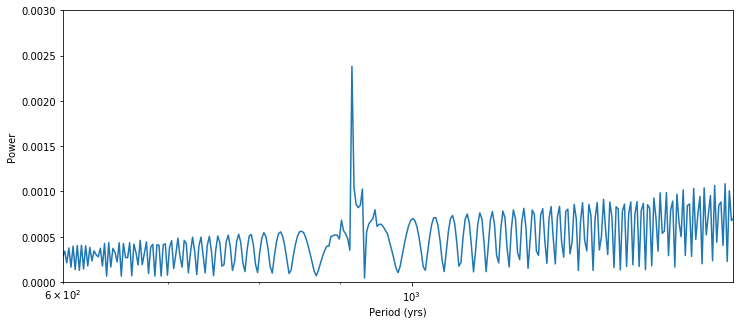

In [25]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.plot(Ps,np.sqrt(4*periodogram/Nout))
ax.set_xscale('log')
ax.set_xlim([600,1600])
ax.set_ylim([0,0.003])
ax.set_xlabel("Period (yrs)")
ax.set_ylabel("Power");

This is the right timescale to be due to resonant perturbations between giant planets ($\sim 100$ orbits).  In fact, Jupiter and Saturn are close to a 5:2 mean-motion resonance.  This is the famous great inequality that Laplace showed was responsible for slight offsets in the predicted positions of the two giant planets.  Let's check whether this is in fact responsible for the peak.  

### Resonance

In this case, we have that the mean longitude of Jupiter $\lambda_J$ cycles approximately 5 times for every 2 of Saturn's ($\lambda_S$).  The game is to construct a slowly-varying resonant angle, which here could be $\phi_{5:2} = 5\lambda_S - 2\lambda_J - 3\varpi_J$, where $\varpi_J$ is Jupiter's longitude of pericenter.  This last term is a much smaller contribution to the variation of $\phi_{5:2}$ than the first two, but ensures that the coefficients in the resonant angle sum to zero and therefore that the physics do not depend on your choice of coordinates.

To see a clear trend, we have to shift each value of $\phi_{5:2}$ into the range $[0,360]$ degrees.

Now we construct $\phi_{5:2}$ and plot it over the first 5000 yrs. 

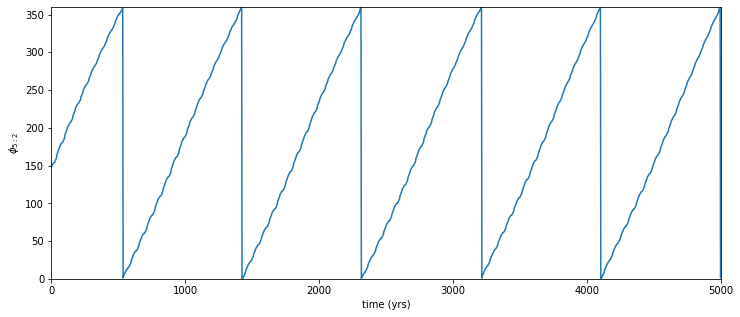

In [26]:
Nout = len(times)
phi = [zeroTo360(5.*Saturn['longitude'][i] - 2.*Jupiter['longitude'][i] 
                 - 3.*Jupiter['varpi'][i]) for i in range(Nout)]

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.plot(times, phi)
ax.set_xlim([0,5.e3])
ax.set_ylim([0,360.])
ax.set_xlabel("time (yrs)")
ax.set_ylabel(r"$\phi_{5:2}$");

We see that the resonant angle $\phi_{5:2}$ circulates, but with a long period of $\approx 900$ yrs (compared to the orbital periods of $\sim 10$ yrs), which precisely matches the blip we saw in the Lomb-Scargle periodogram.  This is approximately the same oscillation period observed in the Solar System, despite our simplified setup!

This resonant angle is able to have a visible effect because its (small) effects build up coherently over many orbits.   As a further illustration, other resonance angles like those at the 2:1 will circulate much faster (because Jupiter and Saturn's period ratio is not close to 2).  We can easily plot this.  Taking one of the 2:1 resonance angles $\phi_{2:1} = 2\lambda_S - \lambda_J - \varpi_J$,

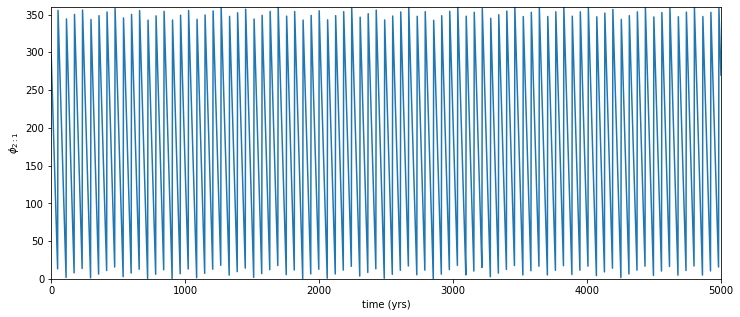

In [27]:
phi2 = [zeroTo360(2*Saturn['longitude'][i] - Jupiter['longitude'][i] 
                  - Jupiter['varpi'][i]) for i in range(Nout)]

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.plot(times,phi2)
ax.set_xlim([0,5.e3])
ax.set_ylim([0,360.])
ax.set_xlabel("time (yrs)")
ax.set_ylabel(r"$\phi_{2:1}$");

In this case, since we are far from this particular resonance (the 2:1), the corresponding resonance angles vary on fast (orbital) timescales, and their effects simply average out.